# Introducing the Sw00pGenerator3000 (SG3K)

The Sw00pGenerator3000, or SG3K, is a cutting-edge GPS analysis tool meticulously crafted to empower swoopers at every level of expertise. Whether you're taking your first plunge into the exhilarating world of swooping or you're a seasoned competitor seeking continuous improvement, the SG3K is your key to accelerating your learning curve. With this advanced tool, you can make remarkable progress in refining your performance while minimizing the number of jumps needed.

In [1]:
%%capture
import io
import import_ipynb

from sg3k_basic import *
from ipywidgets import widgets
from IPython.display import display

In [2]:
uploader = widgets.FileUpload(
    accept='*.csv',
    multiple=False
)
display(uploader)

FileUpload(value=(), accept='*.csv', description='Upload')

In [10]:
jump_df = DatasetService(file = io.BytesIO(uploader.value[0].content.tobytes())).create_jump_data()
if jump_df is not None:
    display(jump_df.head())

,timestamp,time_sec,lat,lon,elevation,horz_distance_ft,horz_distance_m,x_axis_distance_ft,x_axis_distance_m,y_axis_distance_ft,y_axis_distance_m,vert_speed_mph,horz_speed_mph,vert_speed_km/u,horz_speed_km/u,dive_angle,name,user_id
0,2024-06-29 07:43:14.400000+00:00,0.0,50.852594,3.150388,18.979659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.185576,0.474526,-1.908,0.763675,-68.186287,D06-29-2024T0743v1,None
1,2024-06-29 07:43:14.600000+00:00,0.2,50.852594,3.150388,19.284777,0.129587,0.039498,-0.069506,-0.021185,0.109309,0.033317,-1.051360,0.382248,-1.692,0.615168,-70.020018,D06-29-2024T0743v1,None
2,2024-06-29 07:43:14.800000+00:00,0.4,50.852595,3.150388,19.425853,0.206152,0.062835,-0.092749,-0.028270,0.182228,0.055543,-0.917144,0.380936,-1.476,0.613058,-67.444402,D06-29-2024T0743v1,None
3,2024-06-29 07:43:15+00:00,0.6,50.852595,3.150388,19.468504,0.292543,0.089167,-0.046709,-0.014237,0.255289,0.077812,-0.671081,0.360695,-1.080,0.580483,-61.742688,D06-29-2024T0743v1,None
4,2024-06-29 07:43:15.200000+00:00,0.8,50.852595,3.150388,19.570210,0.402037,0.122541,-0.046931,-0.014305,0.364738,0.111172,-1.207945,0.631514,-1.944,1.016323,-62.399441,D06-29-2024T0743v1,None


In [11]:
landing_service = LandingService(jump_df)
if hasattr(landing_service, 'landing_df'):
    print(textwrap.dedent(landing_service.get_landing_data('km/u', 'm')).strip())

exited airplane:      8505.2 ft AGL
initiated turn:       474.1 ft AGL, 22.4 m back, -108.9 m offset
max vertical speed:   141.0 ft AGL, 82.6 m back, -33.3 m offset (78.0 km/u)
started rollout:      141.0 ft AGL, 82.6 m back, -33.3 m offset (78.0 km/u)
finished rollout:     0.0 ft AGL, 0.0 m back, 0.0 m offset
max horizontal speed: 24.8 ft AGL, 47.5 m back, -13.3 m offset (87.8 km/u)

degrees of rotation:      ---- deg (--- -hand)
time to execute turn:     7.2 sec
time during rollout:      4.2 sec
time aloft during swoop:  5.4 sec

entry gate speed:      69 km/u
distance to stop:      53 m


<br>

**Overview**

This provides a comprehensive overview of the maneuver, displaying elevation, horizontal speed, vertical speed, and the dive angle. Additionally, two vertical lines are incorporated to offer more information regarding the commencement and conclusion of the rollout.

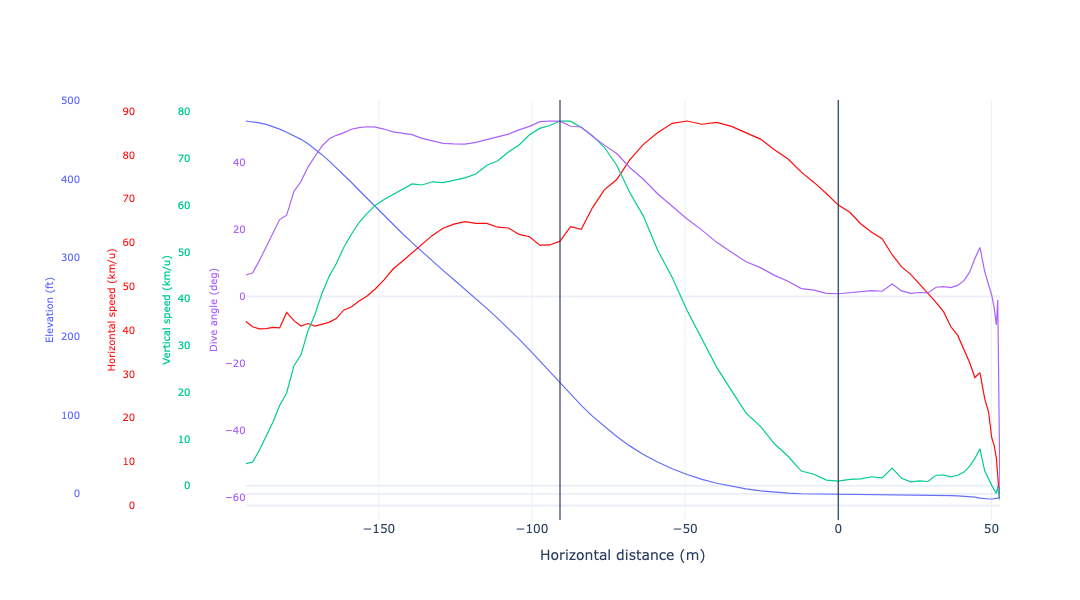

In [12]:
landing_viz = LandingVisualisations(df=jump_df, speed_metric='km/u', distance_metric='m')
landing_viz.plt_overview(['Elevation', 'Horizontal speed', 'Vertical speed', 'Dive angle'])

**Side View Of Flight Path**

A profile view of the flight path: This perspective offers a clear observation of the landing's rollout, revealing the steepness and proximity to the gate during the approach. Additionally, it provides insight into the altitude at which the maneuver was initiated.

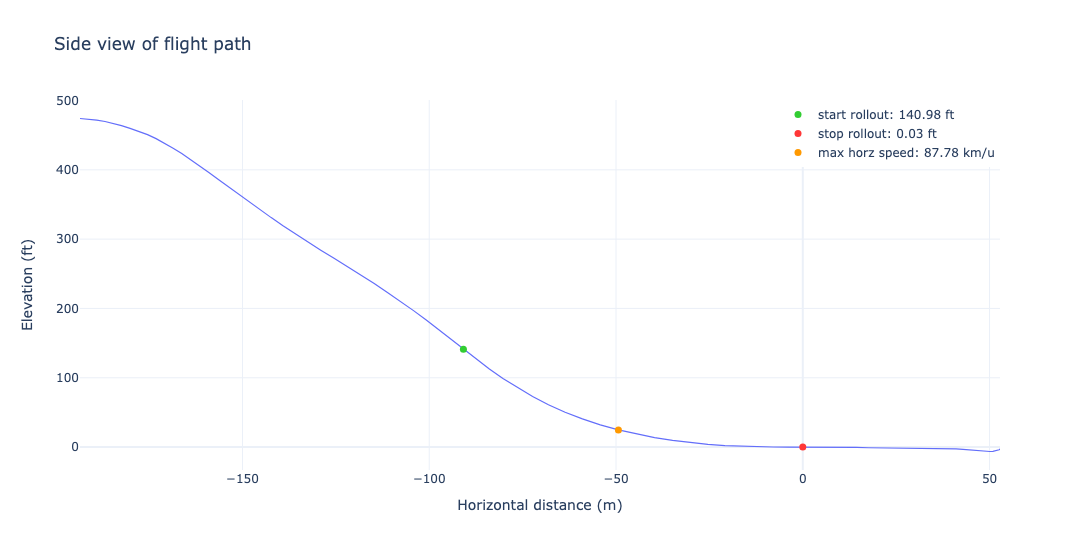

In [13]:
landing_viz.plt_side_view()

**Overhead View Of Flight Path**


An overhead perspective of the flight trajectory: In this scenario, a 270-degree turn was executed, with a noteworthy aspect being the inclusion of a single, discernible "snap."

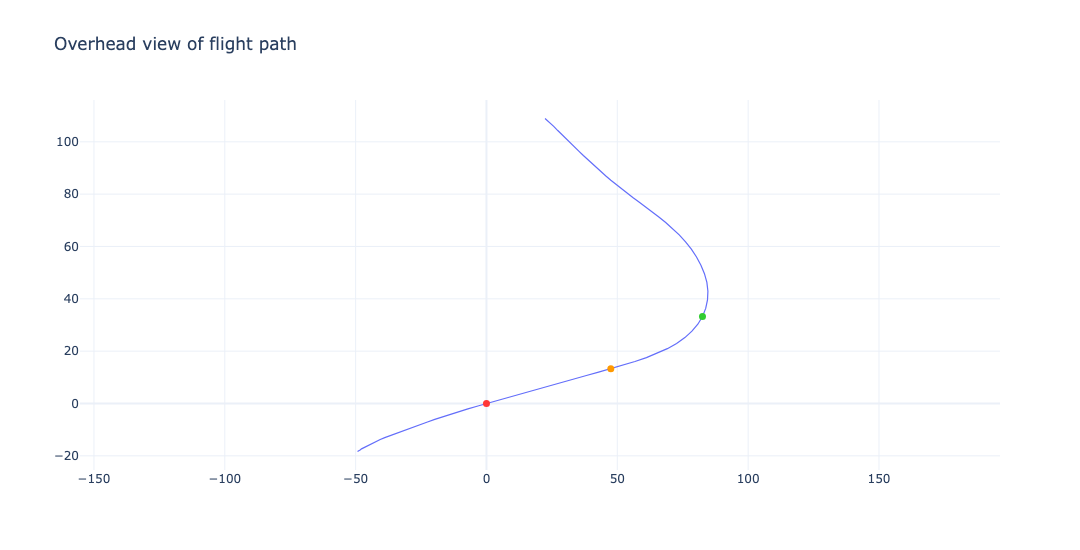

In [14]:
landing_viz.plt_overhead()

**Map**

An aerial perspective of the flight trajectory overlaid on satellite imagery: In this particular case, a 270-degree turn was executed, with a notable feature being a singular, distinctive "snap" incorporated into the maneuver.

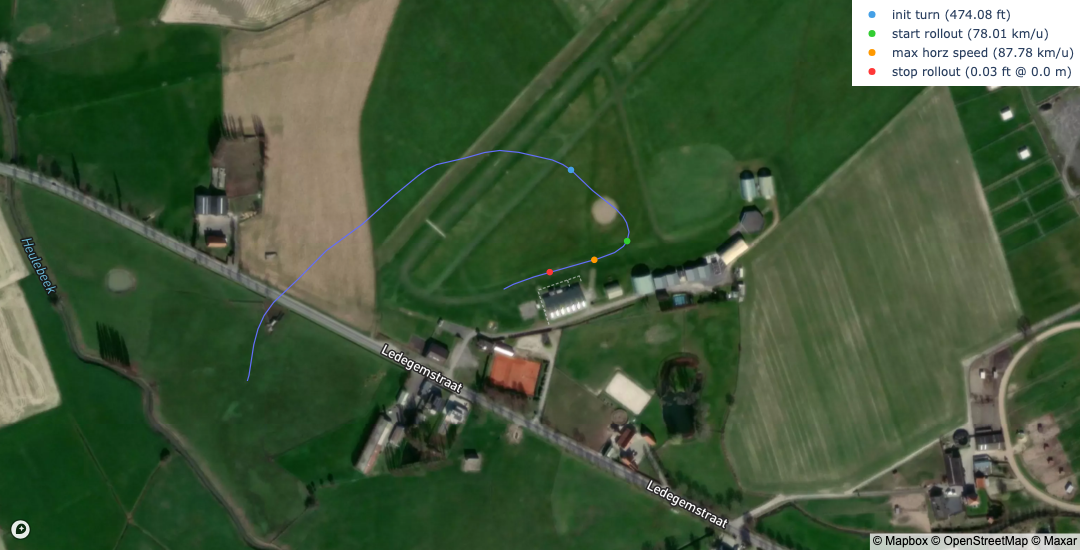

In [15]:
landing_viz.plt_map()

**Horizontal Speed**

This plot illustrates the horizontal speed throughout the maneuver. However, it's worth noting that this peak horizontal speed is not attained during the plane out phase. As a result, there is room for improvement in refining the maneuver.

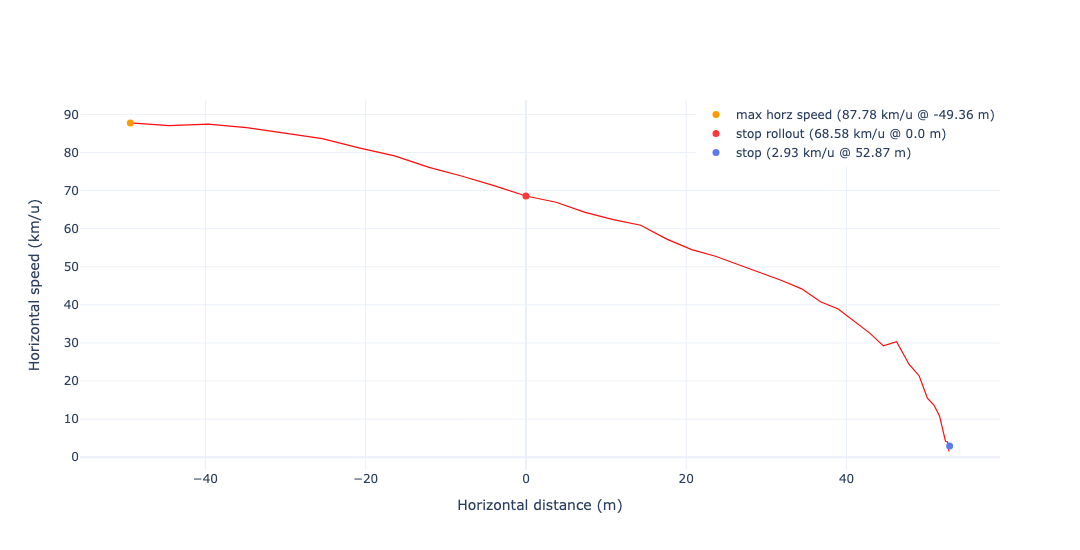

In [16]:
landing_viz.plt_speed()